In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt  
from datetime import datetime
import itertools

# График временных рядов по использованию энергии


## Подготовка данных


In [2]:
data = pd.read_csv('genCons1Table.csv', sep=';')
data['M_DATE'] = pd.to_datetime(data['M_DATE'], infer_datetime_format=True)
indexedData  =data.set_index(['M_DATE'])
indexedData = pd.DataFrame(indexedData["E_USE_FACT"])
# indexedDataset.add(data["E_USE_PLAN"])
# print(data["E_USE_PLAN"][0:15])
indexedData = indexedData[indexedData["E_USE_FACT"]>0]

indexedData.head()

,E_USE_FACT
M_DATE,
2020-01-27,87584
2020-01-27,86497
2020-01-27,85858
2020-01-27,86158
2020-01-27,88435


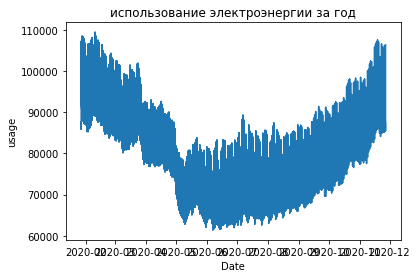

In [3]:
plt.xlabel('Date')
plt.ylabel('usage')
plt.title('использование электроэнергии за год')
plt.plot(indexedData, animated= True)
plt.show(block=False)

<AxesSubplot:title={'center':'Boxplot for day'}, xlabel='Часы', ylabel='USED_FACT'>

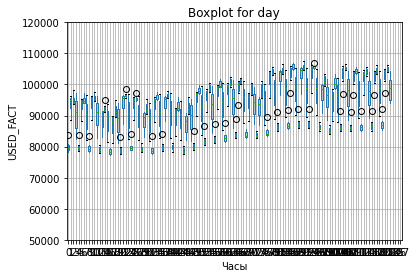

In [4]:
from pandas import Grouper

series = pd.read_csv('Генерация и потребление_28.10.2020.csv', sep=';', header=0, parse_dates=True, squeeze=True, index_col='POWER_SYS_ID')

series['Date']= pd.to_datetime(series['M_DATE'], format="%d.%m.%Y %H:%M:%S") 
series['Date'] +=  pd.to_timedelta(series['INTERVAL'], unit='h')
                                          
series  =series.set_index(['Date'])
series = pd.DataFrame(series["E_USE_FACT"])

groups = series.groupby(Grouper(freq='6H'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)

plt.gca().set(ylim=(50000, 120000),
              xlabel='Months', ylabel='fact')

months.columns = range(0,128  )
plt.xlabel("Часы")
plt.ylabel("USED_FACT")
plt.title('Boxplot for day')
#plt.figure(figsize=(10,10))
months.boxplot()


# определение скользящей средней

            E_USE_FACT
M_DATE                
2020-01-27         NaN
2020-01-27         NaN
2020-01-27         NaN
2020-01-27         NaN
2020-01-27         NaN
            E_USE_FACT
M_DATE                
2020-01-27         NaN
2020-01-27         NaN
2020-01-27         NaN
2020-01-27         NaN
2020-01-27         NaN


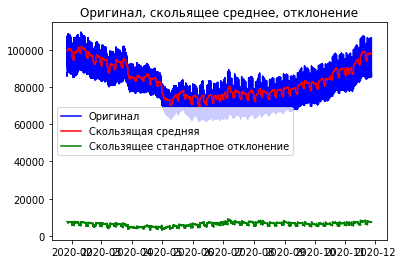

<Figure size 720x720 with 0 Axes>

In [5]:
rolmean = indexedData.rolling(window=24).mean()
rolstd = indexedData.rolling(window=24).std()
print(rolmean.head(5))
print(rolstd.head(5))
orig = plt.plot(indexedData, color='blue',label='Оригинал')
mean = plt.plot(rolmean, color='red',label='Скользящая средняя ' )
std = plt.plot(rolstd, color='green',label='Скользящее стандартное отклонение' )
plt.legend(loc='best')
plt.title('Оригинал, скольящее среднее, отклонение')
plt.figure(figsize=(10, 10))
plt.show(block=False)

### Тест Дики — Фуллера

In [35]:
from statsmodels.tsa.stattools import adfuller
%run predictKernel.ipynb

def test_stationarity(timeseries):
    print ('Results of ADF (Дополненный тест Дики-Фулерра):')
    print ('Null Hypotesis: Time Series is Non-Stationary') 
    dftest = adfuller(timeseries, autolag='AIC')
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num of Lags : ", dftest[2])
    print("4. Num of Observations Used", dftest[3])
    print("5. Critical Values: ")
    for key,value in dftest[4].items():
        print("\t", key, ":",value)
    if dftest[0] < dftest[4]["5%"]:
        print("Reject Null Hypotesis - Временной ряд стационарен")
    else:
        print("Failed to Reject Null Hypotesis - Временной ряд стационарен ")
        
test_stationarity(indexedData)

Results of ADF (Дополненный тест Дики-Фулерра):
Null Hypotesis: Time Series is Non-Stationary
1. ADF :  -2.2648020648828955
2. P-Value :  0.18357134099037048
3. Num of Lags :  35
4. Num of Observations Used 7296
5. Critical Values: 
	 1% : -3.4312466011794043
	 5% : -2.8619362282168543
	 10% : -2.5669809080325496
Failed to Reject Null Hypotesis - Временной ряд стационарен 


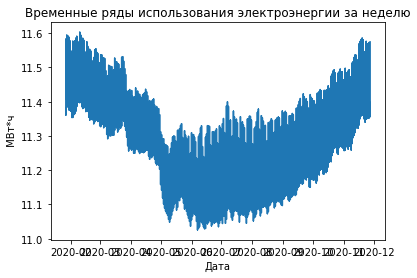

Results of ADF (Дополненный тест Дики-Фулерра):
Null Hypotesis: Time Series is Non-Stationary
1. ADF :  -2.3439266467524087
2. P-Value :  0.1581917202316453
3. Num of Lags :  36
4. Num of Observations Used 7295
5. Critical Values: 
	 1% : -3.4312467241289544
	 5% : -2.8619362825428274
	 10% : -2.566980936951098
Failed to Reject Null Hypotesis - Временной ряд стационарен 


In [7]:
indexedData_logScale = np.log(indexedData)
plt.plot(indexedData_logScale)
plt.xlabel("Дата")
plt.ylabel(" МВт*ч" )
plt.title("Временные ряды использования электроэнергии за неделю")
plt.show(block=False)
#Еще раз тест на стационарность
test_stationarity(indexedData_logScale)

In [8]:

#подсчет скользящей средней 
movAverage = indexedData_logScale.rolling(window=12).mean()
movSTD = indexedData_logScale.rolling(window=20).std()
dataLogScaleMinusMovAverage = indexedData_logScale - movAverage
#Removing Nan Values
dataLogScaleMinusMovAverage.dropna(inplace=True)
#Perform ADF Test
test_stationarity(dataLogScaleMinusMovAverage)

Results of ADF (Дополненный тест Дики-Фулерра):
Null Hypotesis: Time Series is Non-Stationary
1. ADF :  -16.01764664618464
2. P-Value :  6.254939886824085e-29
3. Num of Lags :  36
4. Num of Observations Used 7284
5. Critical Values: 
	 1% : -3.4312480788028767
	 5% : -2.8619368811132198
	 10% : -2.5669812555793188
Reject Null Hypotesis - Временной ряд стационарен


Results of ADF (Дополненный тест Дики-Фулерра):
Null Hypotesis: Time Series is Non-Stationary
1. ADF :  -15.082772167088413
2. P-Value :  8.407949531328143e-28
3. Num of Lags :  36
4. Num of Observations Used 7294
5. Critical Values: 
	 1% : -3.4312468471122295
	 5% : -2.861936336883699
	 10% : -2.5669809658775775
Reject Null Hypotesis - Временной ряд стационарен


a:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
a:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


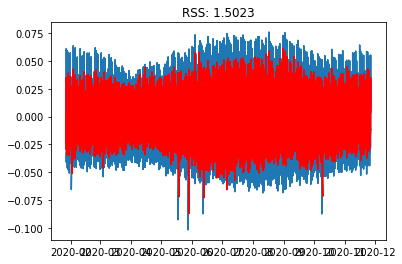

In [23]:
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA

dataLogDiffShifting = indexedData_logScale - indexedData_logScale.shift()
dataLogDiffShifting.dropna(inplace=True)
test_stationarity(dataLogDiffShifting)

model = ARIMA(indexedData_logScale, order=(1, 1, 3)) 
results_ARIMA = model.fit(disp=-1)
plt.plot(dataLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color="red")
plt.title("RSS: %.4f" % sum((results_ARIMA.fittedvalues - dataLogDiffShifting["E_USE_FACT"])**2))
plt.show()

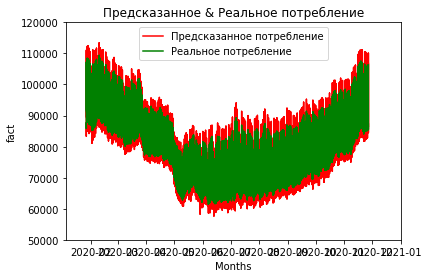

In [24]:
 
#Predictions
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_log = pd.Series(indexedData_logScale["E_USE_FACT"].iloc[0:], index=indexedData_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
#Plotting
plt.plot(predictions_ARIMA,color="red",label="Предсказанное потребление")
plt.plot(indexedData, color="green", label="Реальное потребление")
plt.legend(loc="best")
plt.title("Предсказанное & Реальное потребление")
plt.gca().set(xlim=('2020-01-05', '2021'), ylim=(50000, 120000),
              xlabel='Months', ylabel='fact')
# plt.xlabel("Months")
# plt.ylabel("avg fact")
plt.xticks(fontsize=10); 
plt.yticks(fontsize=10)
plt.show()

a:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
a:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
a:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


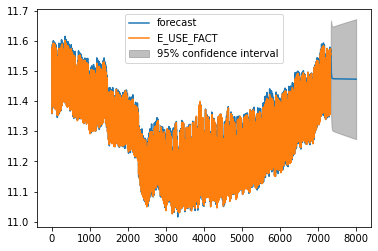

In [25]:
results_ARIMA.plot_predict(1,8000)
x= results_ARIMA.forecast(steps=12)

In [271]:
#Forecasting
prediction = pd.DataFrame(np.exp(x[0]))
prediction["predicted E"] = prediction[0]
prediction.index=pd.date_range(start='2018-1', end='2019-1', freq="M").strftime("%Y-%b")
prediction = pd.DataFrame(round(prediction["predicted E"],2))
prediction


,predicted E
2018-Jan,106325.61
2018-Feb,105515.22
2018-Mar,104592.32
2018-Apr,103765.02
2018-May,103022.82
2018-Jun,102356.48
2018-Jul,101757.85
2018-Aug,101219.73
2018-Sep,100735.74
2018-Oct,100300.22


In [37]:
import csv
counter = 0;

dictionary = dict()
dialect = csv.excel

with open('finalres.csv', "w+", newline="", encoding="utf-8") as result:
    
    fnames = ['DATE', 'GEN_PLAN', 'GEN_FACT','E_USE_FACT', "PREDICTION"]
    writer = csv.DictWriter(result, fieldnames=fnames, dialect=dialect, delimiter=';')
    writer.writeheader()
    
    with open('центр ноябрь декабрь 2018.csv', "r") as csvfile:
        reader = csv.DictReader(csvfile, delimiter=';')

        for row in reader:
#             interval = pd.to_timedelta(int(row['INTERVAL']), unit='H')
#             row["M_DATE"] =  pd.to_datetime(row['M_DATE'], format="%d.%m.%Y %H:%M:%S") + interval

            date =row["M_DATE"]
            USE_FACT= row["E_USE_FACT"]
            GEN_FACT = row['GEN_FACT']
            GEN_PLAN = row['GEN_PLAN']
            predict = GetPredictValue(date)

            writer.writerow({"DATE":date, "E_USE_FACT":USE_FACT, "GEN_FACT":GEN_FACT,'GEN_PLAN':GEN_PLAN,  "PREDICTION":predict})

            if counter<20: 
                print(date, USE_FACT,GEN_FACT, predict) 
                counter+=1

        

01.11.2018 0:00:00 25020 26204 26425
01.11.2018 0:00:00 24568 25997 26196
01.11.2018 0:00:00 24528 26158 26545
01.11.2018 0:00:00 24872 26588 26917
01.11.2018 0:00:00 25944 27786 28388
01.11.2018 0:00:00 28056 30307 30708
01.11.2018 0:00:00 29455 30944 31436
01.11.2018 0:00:00 31280 32437 33393
01.11.2018 0:00:00 32006 32980 33804
01.11.2018 0:00:00 32135 32740 33812
01.11.2018 0:00:00 31596 32352 33248
01.11.2018 0:00:00 31651 32406 33118
01.11.2018 0:00:00 32039 32705 33640
01.11.2018 0:00:00 31863 32410 33035
01.11.2018 0:00:00 31957 32223 32938
01.11.2018 0:00:00 32246 32485 32998
01.11.2018 0:00:00 32707 33544 34044
01.11.2018 0:00:00 32416 33205 33848
01.11.2018 0:00:00 31717 32568 33187
01.11.2018 0:00:00 30846 31962 32999
